In [1]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [ ]:
data = pd.read_csv("forestfires.csv")
# Read the csv using pandaas
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [ ]:
data = data[["X", "DMC", "DC", "ISI", "FFMC", "temp", "area", "wind", "rain"]]
# Prints only the essential data
print(data.head())


    DMC     DC  ISI  FFMC  temp  area  wind  rain
0  26.2   94.3  5.1  86.2   8.2   0.0   6.7   0.0
1  35.4  669.1  6.7  90.6  18.0   0.0   0.9   0.0
2  43.7  686.9  6.7  90.6  14.6   0.0   1.3   0.0
3  33.3   77.5  9.0  91.7   8.3   0.0   4.0   0.2
4  51.3  102.2  9.6  89.3  11.4   0.0   1.8   0.0


In [ ]:
predict = "DC"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [ ]:
# Split the data set into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [ ]:
linear = linear_model.LinearRegression()

# # Define the line of best fit
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.5193241117513647


In [ ]:
with open("forestfires.pickle", "wb") as f:
    pickle.dump(linear, f)

In [ ]:
# Load the pickle file
pickle_in = open("forestfires.pickle", "rb")
linear = pickle.load(pickle_in)

In [ ]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [  2.18316135  -0.9595598    1.49584389   8.95061211  -0.04428003
 -11.80886172 -13.81836883]
Intercept: 
 61.273233893042516


In [ ]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

624.9887901054573 [126.5   7.   90.9  19.4   0.    1.3   0. ] 686.5
695.4613648695012 [169.7  12.3  93.9  23.4   0.    6.3   0. ] 411.8
546.9594626086741 [122.3   12.9   94.2   15.4   10.13   4.     0.  ] 589.9
454.113322102028 [82.9   6.2  90.1  15.4  37.71  4.5   0.  ] 735.7
374.80207408974456 [39.7   6.2  90.1  15.2  31.86  3.1   0.  ] 86.6
348.6111928670191 [32.8  3.  84.9 16.7  0.   4.9  0. ] 664.2
594.4644858976349 [102.3   8.4  92.2  24.2   0.    3.1   0. ] 751.5
486.3156091115387 [85.1 15.9 94.3 19.8  0.   5.4  0. ] 692.3
216.56696115223028 [ 3.6   1.8  79.5   4.6   6.84  0.9   0.  ] 15.3
733.8802224754046 [1.751e+02 1.380e+01 9.180e+01 2.570e+01 9.000e-02 5.400e+00 0.000e+00] 700.7
866.509518589109 [290.    7.4  90.3  10.3  18.3   4.    0. ] 855.3
550.9327209671659 [145.4  10.7  91.5   8.    0.    2.2   0. ] 608.2
571.9371761492599 [147.3    9.    88.8   14.4    5.23   5.4    0.  ] 614.5
495.3007394304168 [88.8   8.5  92.3  17.1   6.57  3.6   0.  ] 440.9
596.9446659712389 [142

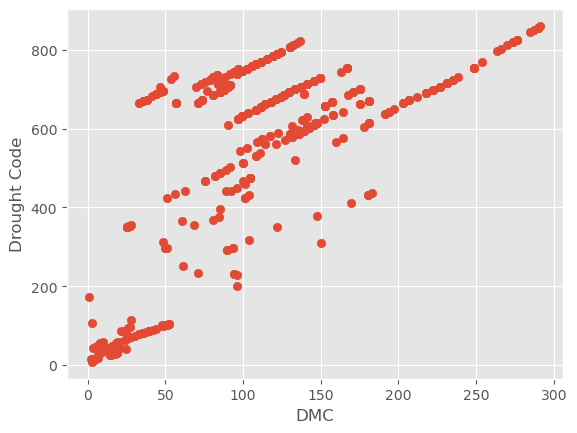

In [441]:
style.use("ggplot")

# Set up a scatter plot
pyplot.scatter(predictions, y_test)
pyplot.xlabel("predictions")
pyplot.ylabel("Drought Code")
pyplot.show()